In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import heartpy as hp
import matplotlib.pyplot as plt

## Load normal 

In [36]:
df_normal = pd.read_csv('../data/ptbdb_normal.csv', header=None)

df_normal.dropna()

df_normal.head(10)

sample_rate = 188

## Filrowanie sygnału
Używamy heartpy do filtrowania sygnału

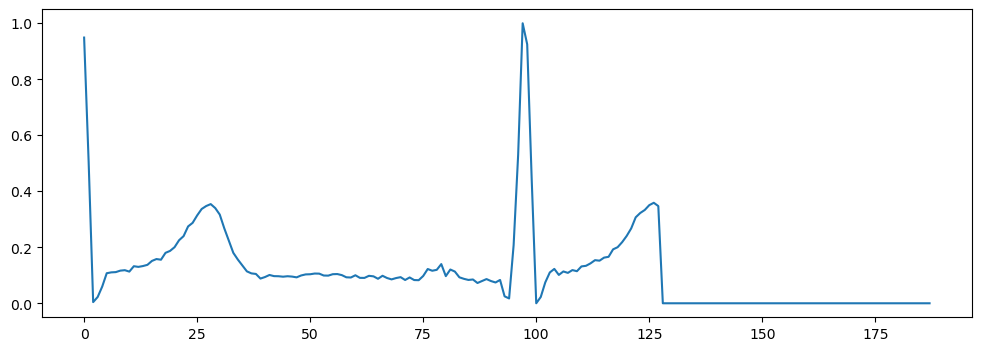

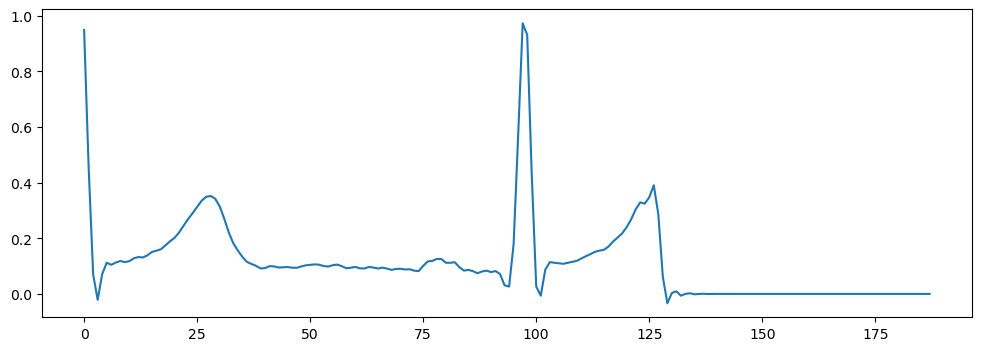

In [37]:
plt.figure(figsize=(12,4))
plt.plot(df_normal.iloc[5])
plt.show()

data_filtered = hp.filter_signal(df_normal.iloc[5], cutoff = 8, sample_rate = 25.0, order = 3, filtertype='lowpass')

plt.figure(figsize=(12,4))
plt.plot(data_filtered)
plt.show()

## Load abnormal

In [38]:
df_abnormal = pd.read_csv('../data/ptbdb_abnormal.csv',header=None)

df_abnormal.dropna()

df_abnormal.head(10)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.925265,0.433352,0.073620,0.079197,0.136643,0.182934,0.182934,0.182376,0.196877,0.203569,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.999144,0.774829,0.522260,0.250856,0.000000,0.066781,0.093322,0.144692,0.154110,0.152397,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,1.000000,0.871452,0.678353,0.357262,0.051196,0.000000,0.090707,0.142460,0.138564,0.185309,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,1.000000,0.729630,0.583333,0.350926,0.279630,0.321296,0.267593,0.229630,0.218519,0.203704,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.932234,0.810440,0.627595,0.422161,0.263126,0.145910,0.109280,0.088523,0.079976,0.073565,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [39]:
def get_measures(df):
    df_result = pd.DataFrame()
    
    for i in range(0, len(df)):
        current_row = df.iloc[i]
        try:
            filtered = hp.filter_signal(current_row, cutoff = 8, sample_rate = 25.0, order = 3, filtertype='lowpass')
            w, m = hp.process(hp.scale_data(filtered), len(current_row)) 
            df_processed = pd.DataFrame([m])
            df_result = pd.concat([df_result, df_processed])
        except:
            pass
        
    return df_result

### Wyciągnięcie z danych df_normal informacji na temat bpm, ibi i podobnych za pomocą heartpy 

In [40]:
df_normal_processed = get_measures(df_normal)
df_normal_processed.head(10)

/opt/homebrew/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/homebrew/anaconda3/lib/python3.11/site-packages/numpy/ma/core.py:5334: RuntimeWarning: Mean of empty slice.
  result = super().mean(axis=axis, dtype=dtype, **kwargs)[()]
/opt/homebrew/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


,bpm,ibi,sdnn,sdsd,rmssd,pnn20,pnn50,hr_mad,sd1,sd2,s,sd1/sd2,breathingrate
0,NaN,NaN,NaN,--,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,278.518519,215.425532,210.106383,0.0,420.212766,1.0,1.0,210.106383,0.0,0.0,0.0,NaN,NaN
0,5640.000000,10.638298,0.000000,--,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
0,118.736842,505.319149,0.000000,--,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
0,223.366337,268.617021,247.340426,0.0,494.680851,1.0,1.0,247.340426,0.0,0.0,0.0,NaN,NaN
0,5640.000000,10.638298,0.000000,--,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
0,5640.000000,10.638298,0.000000,--,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
0,245.217391,244.680851,234.042553,0.0,468.085106,1.0,1.0,234.042553,0.0,0.0,0.0,NaN,NaN
0,205.090909,292.553191,0.000000,--,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
0,278.518519,215.425532,210.106383,0.0,420.212766,1.0,1.0,210.106383,0.0,0.0,0.0,NaN,NaN


In [41]:
print(f"Dane zignorowane przez heartpy z df_normal: {df_normal.shape[0] - df_normal_processed.shape[0]}")

Dane zignorowane przez heartpy z df_normal: 25


### Add Class feature

In [42]:
df_normal_processed["Class"] = 0

In [43]:
df_normal_processed.fillna(0, inplace=True)

### Wyciągnięcie z danych df_abnormal informacji na temat bpm, ibi i podobnych za pomocą heartpy 

In [44]:
df_abnormal_processed = get_measures(df_abnormal)
df_abnormal_processed.head(10)

/opt/homebrew/anaconda3/lib/python3.11/site-packages/numpy/ma/core.py:5334: RuntimeWarning: Mean of empty slice.
  result = super().mean(axis=axis, dtype=dtype, **kwargs)[()]
/opt/homebrew/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/homebrew/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


,bpm,ibi,sdnn,sdsd,rmssd,pnn20,pnn50,hr_mad,sd1,sd2,s,sd1/sd2,breathingrate
0,88.818898,675.531915,0.000000,--,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
0,145.548387,412.234043,50.531915,0.0,101.063830,1.0,1.0,50.531915,0.0,0.0,0.0,NaN,NaN
0,103.486239,579.787234,0.000000,--,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
0,129.655172,462.765957,0.000000,--,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,--,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,105.420561,569.148936,0.000000,--,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
0,120.000000,500.000000,0.000000,--,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
0,168.358209,356.382979,0.000000,--,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
0,317.746479,188.829787,103.723404,0.0,207.446809,1.0,1.0,103.723404,0.0,0.0,0.0,NaN,NaN
0,176.250000,340.425532,0.000000,--,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN


In [45]:
print(f"Dane zignorowane przez heartpy z df_abnormal: {df_abnormal.shape[0] - df_abnormal_processed.shape[0]}")

Dane zignorowane przez heartpy z df_abnormal: 259


### Add class feature

In [46]:
df_abnormal_processed["Class"] = 1

In [47]:
df_abnormal_processed.fillna(0, inplace=True)

### Sprawdzenie

In [48]:
df_abnormal_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10247 entries, 0 to 0
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bpm            10247 non-null  float64
 1   ibi            10247 non-null  float64
 2   sdnn           10247 non-null  float64
 3   sdsd           10247 non-null  object 
 4   rmssd          10247 non-null  float64
 5   pnn20          10247 non-null  float64
 6   pnn50          10247 non-null  float64
 7   hr_mad         10247 non-null  float64
 8   sd1            10247 non-null  float64
 9   sd2            10247 non-null  float64
 10  s              10247 non-null  float64
 11  sd1/sd2        10247 non-null  float64
 12  breathingrate  10247 non-null  float64
 13  Class          10247 non-null  int64  
dtypes: float64(12), int64(1), object(1)
memory usage: 1.2+ MB


In [49]:
df_normal_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4021 entries, 0 to 0
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bpm            4021 non-null   float64
 1   ibi            4021 non-null   float64
 2   sdnn           4021 non-null   float64
 3   sdsd           4021 non-null   object 
 4   rmssd          4021 non-null   float64
 5   pnn20          4021 non-null   float64
 6   pnn50          4021 non-null   float64
 7   hr_mad         4021 non-null   float64
 8   sd1            4021 non-null   float64
 9   sd2            4021 non-null   float64
 10  s              4021 non-null   float64
 11  sd1/sd2        4021 non-null   float64
 12  breathingrate  4021 non-null   float64
 13  Class          4021 non-null   int64  
dtypes: float64(12), int64(1), object(1)
memory usage: 471.2+ KB


In [50]:
df_normal_processed.head()

,bpm,ibi,sdnn,sdsd,rmssd,pnn20,pnn50,hr_mad,sd1,sd2,s,sd1/sd2,breathingrate,Class
0,0.000000,0.000000,0.000000,--,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0
0,278.518519,215.425532,210.106383,0.0,420.212766,1.0,1.0,210.106383,0.0,0.0,0.0,0.0,0.0,0
0,5640.000000,10.638298,0.000000,--,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0
0,118.736842,505.319149,0.000000,--,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0
0,223.366337,268.617021,247.340426,0.0,494.680851,1.0,1.0,247.340426,0.0,0.0,0.0,0.0,0.0,0


In [51]:
df_abnormal_processed.head()

,bpm,ibi,sdnn,sdsd,rmssd,pnn20,pnn50,hr_mad,sd1,sd2,s,sd1/sd2,breathingrate,Class
0,88.818898,675.531915,0.000000,--,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1
0,145.548387,412.234043,50.531915,0.0,101.06383,1.0,1.0,50.531915,0.0,0.0,0.0,0.0,0.0,1
0,103.486239,579.787234,0.000000,--,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1
0,129.655172,462.765957,0.000000,--,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1
0,0.000000,0.000000,0.000000,--,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1


## Wizualizacja danych zanjdowanych przez heartpy

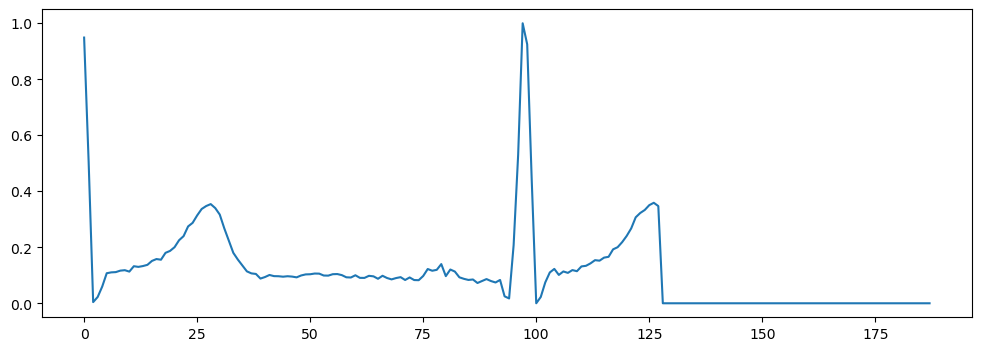

Normal measure.
bpm: 5640.000000
ibi: 10.638298
sdnn: 0.000000
sdsd: nan
rmssd: nan
pnn20: nan
pnn50: nan
hr_mad: 0.000000
sd1: nan
sd2: nan
s: nan
sd1/sd2: nan
breathingrate: nan


/opt/homebrew/anaconda3/lib/python3.11/site-packages/numpy/ma/core.py:5334: RuntimeWarning: Mean of empty slice.
  result = super().mean(axis=axis, dtype=dtype, **kwargs)[()]
/opt/homebrew/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/homebrew/anaconda3/lib/python3.11/site-packages/heartpy/visualizeutils.py:119: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/vf/64chshn13sn4686j6gjzck400000gn/T/ipykernel_4662/2966828568.py:12: UserWarning: Warning: converting a masked element to nan.
  print('%s: %f' %(measure, m[measure]))


<Figure size 1200x400 with 0 Axes>

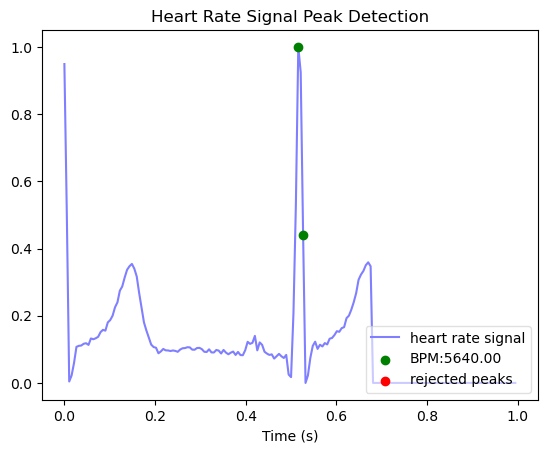

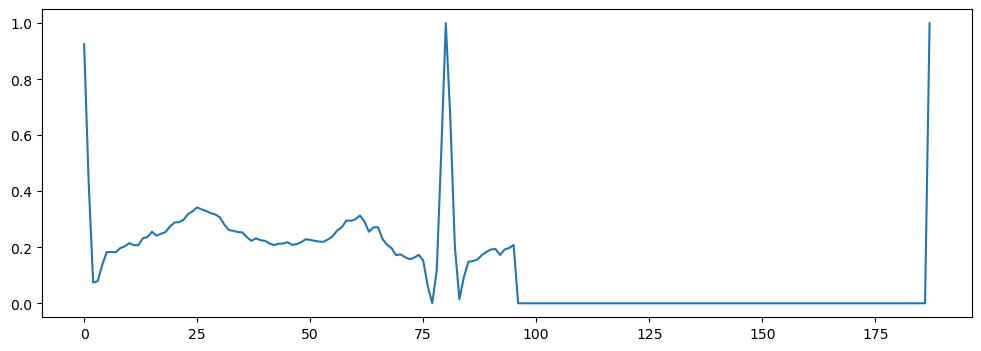

/opt/homebrew/anaconda3/lib/python3.11/site-packages/numpy/ma/core.py:5334: RuntimeWarning: Mean of empty slice.
  result = super().mean(axis=axis, dtype=dtype, **kwargs)[()]
/opt/homebrew/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/homebrew/anaconda3/lib/python3.11/site-packages/heartpy/visualizeutils.py:119: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/vf/64chshn13sn4686j6gjzck400000gn/T/ipykernel_4662/2966828568.py:24: UserWarning: Warning: converting a masked element to nan.
  print('%s: %f' %(measure, m[measure]))


Abnormal measure.
bpm: 105.420561
ibi: 569.148936
sdnn: 0.000000
sdsd: nan
rmssd: nan
pnn20: nan
pnn50: nan
hr_mad: 0.000000
sd1: nan
sd2: nan
s: nan
sd1/sd2: nan
breathingrate: nan


<Figure size 1200x400 with 0 Axes>

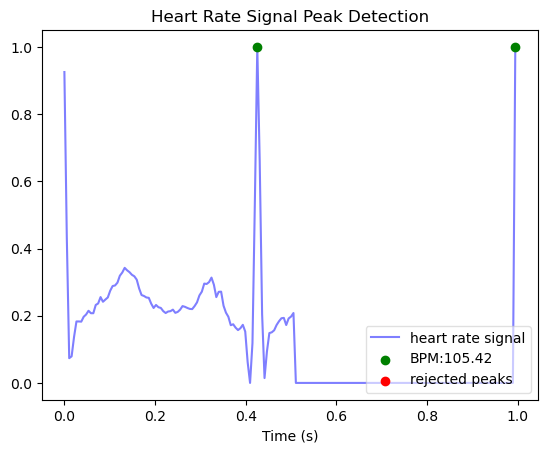

In [52]:

element_number = 5
plt.figure(figsize=(12,4))
plt.plot(df_normal.iloc[element_number])
plt.show()

wd, m = hp.process(df_normal.iloc[element_number], sample_rate)
plt.figure(figsize=(12,4))
hp.plotter(wd, m)

print("Normal measure.")
for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

plt.figure(figsize=(12,4))
plt.plot(df_abnormal.iloc[element_number])
plt.show()

wd, m = hp.process(df_abnormal.iloc[element_number], sample_rate)
plt.figure(figsize=(12,4))
hp.plotter(wd, m)

print("Abnormal measure.")
for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

## Joining tables together

In [53]:
df_complete = pd.concat([df_normal_processed, df_abnormal_processed])

df_complete = df_complete.sample(frac=1)

df_complete


,bpm,ibi,sdnn,sdsd,rmssd,pnn20,pnn50,hr_mad,sd1,sd2,s,sd1/sd2,breathingrate,Class
0,111.683168,537.234043,0.000000,--,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1
0,173.538462,345.744681,0.000000,--,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1
0,470.000000,127.659574,42.553191,0.0,85.106383,1.0,1.0,42.553191,0.0,0.0,0.0,0.0,0.0,0
0,145.548387,412.234043,172.872340,0.0,345.744681,1.0,1.0,172.872340,0.0,0.0,0.0,0.0,0.0,1
0,111.683168,537.234043,0.000000,--,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,161.142857,372.340426,0.000000,--,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0
0,141.000000,425.531915,0.000000,--,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1
0,139.259259,430.851064,0.000000,--,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0
0,395.789474,151.595745,146.276596,0.0,292.553191,1.0,1.0,146.276596,0.0,0.0,0.0,0.0,0.0,0


In [54]:
df_complete_class = df_complete.iloc[:,13:14]
df_complete_class

,Class
0,1
0,1
0,0
0,1
0,1
...,...
0,0
0,1
0,0
0,0


# Scaling data

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
sc = scaler.fit(df_complete.iloc[:,0:13])
df_complete_normalized = sc.transform(df_complete.iloc[:,0:13])

df_complete_normalized = pd.DataFrame(df_complete_normalized)

/opt/homebrew/anaconda3/lib/python3.11/site-packages/pandas/core/generic.py:2084: UserWarning: Warning: converting a masked element to nan.
  arr = np.asarray(values, dtype=dtype)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/pandas/core/generic.py:2084: UserWarning: Warning: converting a masked element to nan.
  arr = np.asarray(values, dtype=dtype)


In [56]:
df_complete_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14268 entries, 0 to 14267
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       14268 non-null  float64
 1   1       14268 non-null  float64
 2   2       14268 non-null  float64
 3   3       4957 non-null   float64
 4   4       14268 non-null  float64
 5   5       14268 non-null  float64
 6   6       14268 non-null  float64
 7   7       14268 non-null  float64
 8   8       14268 non-null  float64
 9   9       14268 non-null  float64
 10  10      14268 non-null  float64
 11  11      14268 non-null  float64
 12  12      14268 non-null  float64
dtypes: float64(13)
memory usage: 1.4 MB


Z racji bardzo małej ilości danych w kolumnie 3 usuwamy kolumnę 3.

In [57]:
df_complete_normalized = df_complete_normalized.drop(axis="columns", labels=3)

In [58]:
df_complete_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14268 entries, 0 to 14267
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       14268 non-null  float64
 1   1       14268 non-null  float64
 2   2       14268 non-null  float64
 3   4       14268 non-null  float64
 4   5       14268 non-null  float64
 5   6       14268 non-null  float64
 6   7       14268 non-null  float64
 7   8       14268 non-null  float64
 8   9       14268 non-null  float64
 9   10      14268 non-null  float64
 10  11      14268 non-null  float64
 11  12      14268 non-null  float64
dtypes: float64(12)
memory usage: 1.3 MB


# Splitting data

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_complete_normalized, df_complete_class, test_size=0.5, random_state=16)

print(('X_train length = {}; y_train length = {}').format(len(X_train),len(y_train)))
print(('X_test length = {}; y_test length = {}').format(len(X_test),len(y_test)))

X_train length = 7134; y_train length = 7134
X_test length = 7134; y_test length = 7134


## Training model

In [60]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

In [61]:
model = GradientBoostingClassifier()

In [62]:
n_scores = cross_val_score(model, X_train, y_train, cv=10, n_jobs=-1)

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

In [63]:
n_scores

array([0.86694678, 0.8557423 , 0.85154062, 0.84453782, 0.88078541,
       0.84992987, 0.87096774, 0.8569425 , 0.85974755, 0.86535764])

In [64]:
np.mean(n_scores)

0.8602498222290318

In [65]:
np.std(n_scores)

0.01033562107763109

In [66]:
model.fit(X_train, y_train)

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

In [82]:
model.score(X_test, y_test)

0.8536585365853658

In [86]:
print('The accuracy of the Gradient Boosting Classifier on the training data is {:.2f} out of 1'.format(model.score(X_train, y_train)))
print('The accuracy of the Gradient Boosting Classifier on the test data is {:.2f} out of 1'.format(model.score(X_test, y_test)))

The accuracy of the Gradient Boosting Classifier on the training data is 0.87 out of 1
The accuracy of the Gradient Boosting Classifier on the test data is 0.85 out of 1


### Implementing XGBoost

In [69]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier()

In [70]:
n_scores_xgb = cross_val_score(model_xgb, X_train, y_train, cv=10, n_jobs=-1)


In [71]:
n_scores_xgb

array([0.8487395 , 0.8627451 , 0.8697479 , 0.85714286, 0.88218794,
       0.85273492, 0.87938289, 0.86956522, 0.85273492, 0.86816269])

In [72]:
np.mean(n_scores_xgb)

0.8643143933590267

In [73]:
np.std(n_scores_xgb)

0.010876883975157514

In [74]:
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [76]:
model_xgb.score(X_test, y_test)

0.8601065320998038

In [79]:
print('The accuracy of the xgboost classifier on the training data is {:.2f} out of 1'.format(model_xgb.score(X_train, y_train)))
print('The accuracy of the xgboost classifier on the test data is {:.2f} out of 1'.format(model_xgb.score(X_test, y_test)))

The accuracy of the xgboost classifier on the training data is 0.89 out of 1
The accuracy of the xgboost classifier on the test data is 0.86 out of 1
